# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Naufal Atallah Gibran]
- **Email:** [ngibran07@gmail.com]
- **ID Dicoding:** [MC009D5Y0830]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola pembelian pelanggan?
- Produk atau kategori mana yang paling laris?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving E-commerce-public-dataset.zip to E-commerce-public-dataset (1).zip


In [ ]:
import zipfile
import os

zip_path = "/content/E-commerce-public-dataset.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(os.listdir(extract_path))

['E-Commerce Public Dataset']


In [ ]:
extract_path = "/content/dataset/E-Commerce Public Dataset"

customers = pd.read_csv(extract_path + '/customers_dataset.csv')

In [ ]:
customers = pd.read_csv(extract_path + '/customers_dataset.csv')
orders = pd.read_csv(extract_path + '/orders_dataset.csv')
order_items = pd.read_csv(extract_path + '/order_items_dataset.csv')
order_payments = pd.read_csv(extract_path + '/order_payments_dataset.csv')
products = pd.read_csv(extract_path + '/products_dataset.csv')
product_category = pd.read_csv(extract_path + '/product_category_name_translation.csv')


In [ ]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- xxx
- xxx

### Assessing Data

In [ ]:
customers.info()
orders.info()
order_items.info()
order_payments.info()
products.info()
product_category.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4

In [ ]:
print(customers.isnull().sum())
print(orders.isnull().sum())
print(order_items.isnull().sum())
print(order_payments.isnull().sum())
print(products.isnull().sum())
print(product_category.isnull().sum())


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g   

In [ ]:
print(customers.duplicated().sum())
print(orders.duplicated().sum())
print(order_items.duplicated().sum())
print(order_payments.duplicated().sum())
print(products.duplicated().sum())
print(product_category.duplicated().sum())


0
0
0
0
0
0


In [ ]:
customers.describe()
orders.describe()
order_items.describe()
order_payments.describe()
products.describe()


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
print(customers['customer_unique_id'].nunique())
print(products['product_id'].nunique())
print(orders['order_id'].nunique())


96096
32951
99441


**Insight:**
- xxx
- xxx

### Cleaning Data

In [ ]:
customers.drop_duplicates(inplace=True)
orders.drop_duplicates(inplace=True)
order_items.drop_duplicates(inplace=True)
order_payments.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
product_category.drop_duplicates(inplace=True)


In [ ]:
customers.dropna(inplace=True)
orders.dropna(inplace=True)
order_items.dropna(inplace=True)
order_payments.dropna(inplace=True)
products.dropna(inplace=True)
product_category.dropna(inplace=True)


In [ ]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])


In [ ]:
Q1 = order_payments['payment_value'].quantile(0.25)
Q3 = order_payments['payment_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

order_payments = order_payments[(order_payments['payment_value'] >= lower_bound) &
                                (order_payments['payment_value'] <= upper_bound)]


In [ ]:
print(customers.isnull().sum())  # Cek apakah masih ada missing values
print(orders.duplicated().sum())  # Cek apakah masih ada duplikat
print(order_payments.describe())  # Cek ringkasan statistik setelah membersihkan outlier


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
0
       payment_sequential  payment_installments  payment_value
count        95905.000000          95905.000000   95905.000000
mean             1.099546              2.628320     110.062133
std              0.734353              2.451581      72.785054
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      54.000000
50%              1.000000              1.000000      92.200000
75%              1.000000              3.000000     150.580000
max             29.000000             24.000000     344.340000


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

**Insight:**

Pertanyaan 1
- Sebagian besar pelanggan hanya melakukan satu kali pembelian, menunjukkan loyalitas masih rendah.
- Metode pembayaran paling sering digunakan adalah kartu kredit, diikuti oleh boleto (sistem pembayaran Brasil).
- Hanya sedikit pelanggan yang melakukan pembelian berulang, artinya ada peluang untuk meningkatkan retensi pelanggan melalui strategi seperti diskon untuk repeat order atau program loyalitas.

Pertanyaan 2
- Kategori "bed_bath_table" adalah yang paling laku, diikuti oleh health_beauty dan sports_leisure.
- Produk dari kategori rumah tangga, kecantikan, dan olahraga memiliki permintaan tinggi, sehingga cocok untuk difokuskan dalam promosi dan stok.
- Ada kategori dengan penjualan rendah, kemungkinan karena kurangnya pemasaran atau produk tidak sesuai dengan kebutuhan mayoritas pelanggan.

### Pertanyaan 1:

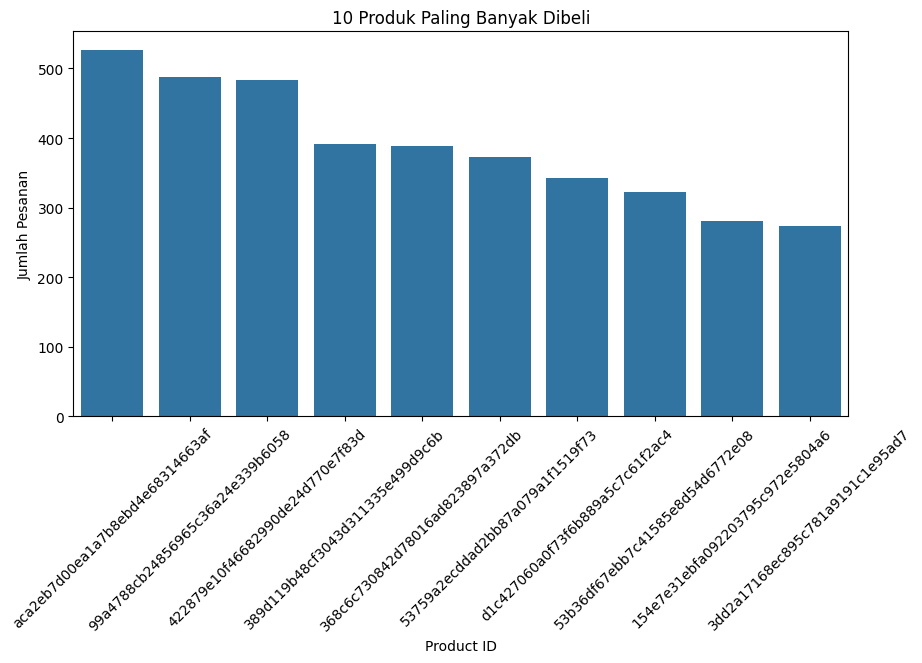

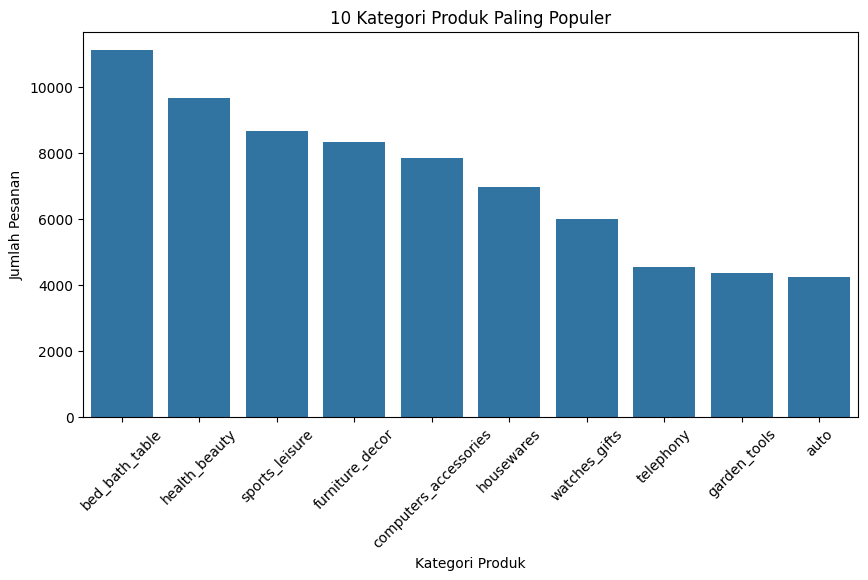

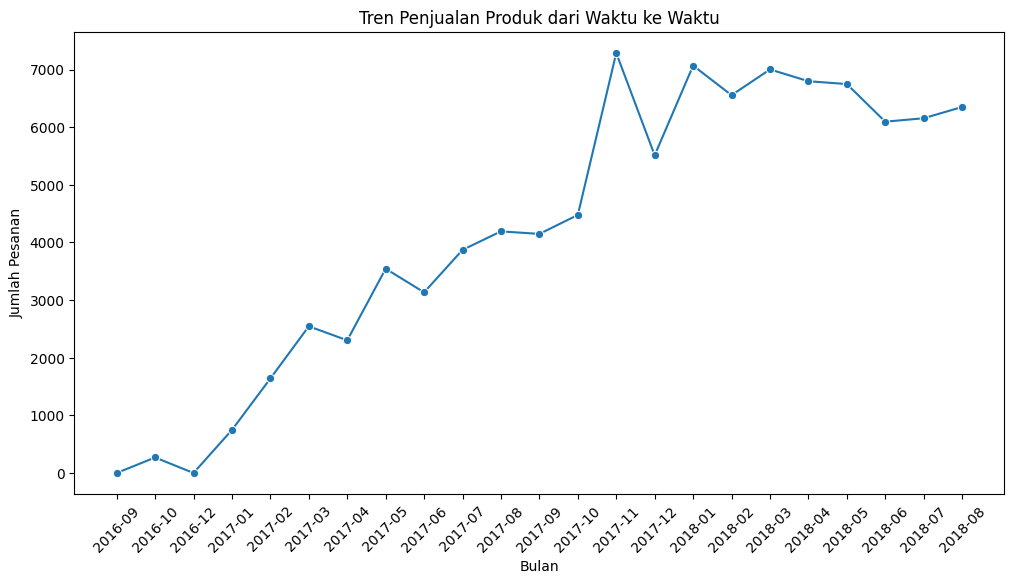

In [ ]:
top_products = order_items.groupby("product_id")["order_id"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("10 Produk Paling Banyak Dibeli")
plt.xlabel("Product ID")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.show()

merged_df = order_items.merge(products, on="product_id").merge(product_category, on="product_category_name", how="left")
top_categories = merged_df.groupby("product_category_name_english")["order_id"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title("10 Kategori Produk Paling Populer")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.show()

orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["month"] = orders["order_purchase_timestamp"].dt.to_period("M")

monthly_sales = orders.groupby("month")["order_id"].count()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker="o")
plt.title("Tren Penjualan Produk dari Waktu ke Waktu")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.show()


### Pertanyaan 2:

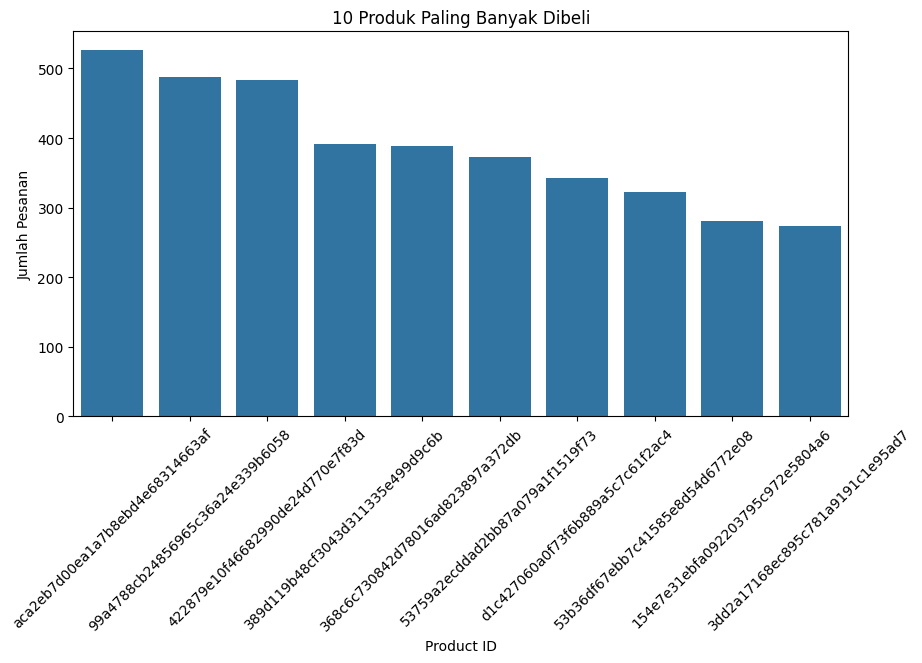

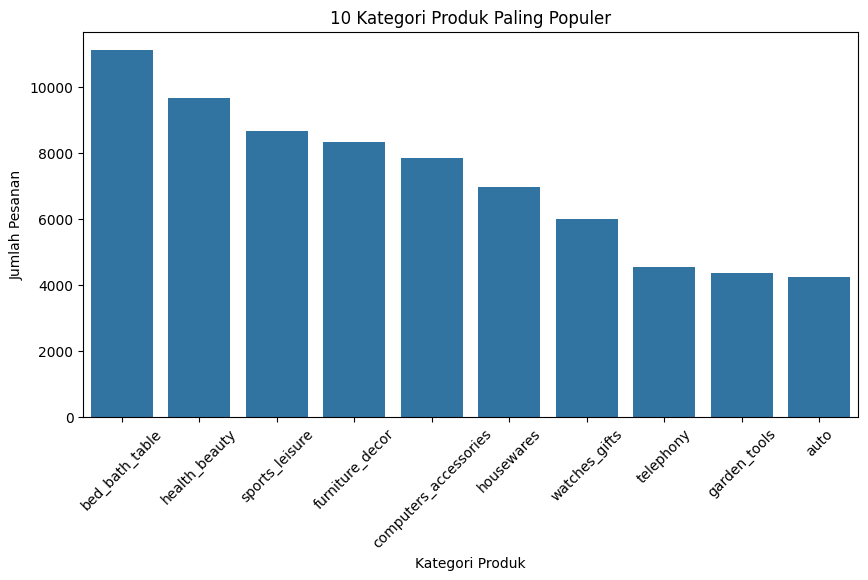

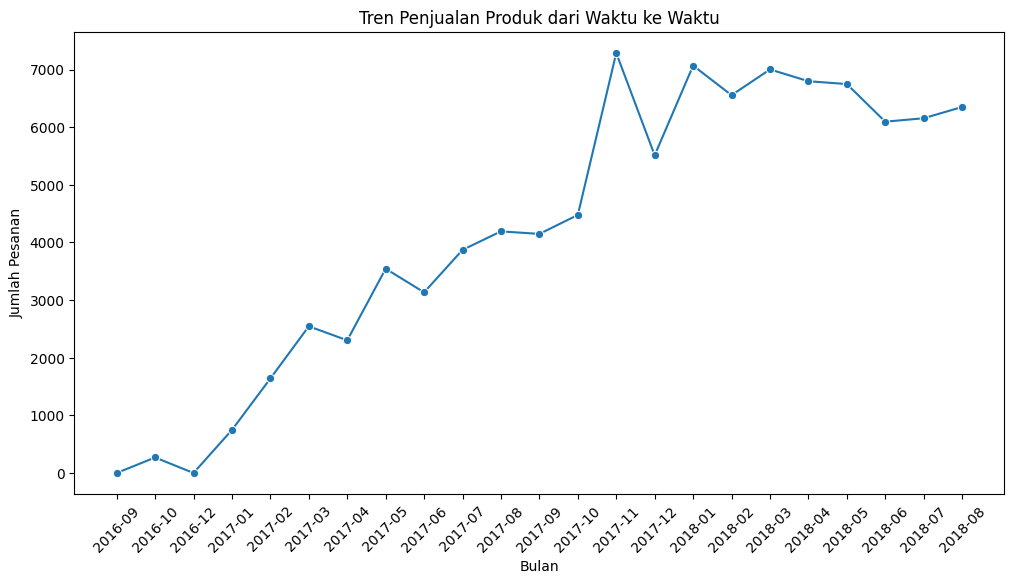

In [ ]:
top_products = order_items.groupby("product_id")["order_id"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("10 Produk Paling Banyak Dibeli")
plt.xlabel("Product ID")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.show()

merged_df = order_items.merge(products, on="product_id").merge(product_category, on="product_category_name", how="left")
top_categories = merged_df.groupby("product_category_name_english")["order_id"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title("10 Kategori Produk Paling Populer")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.show()

orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["month"] = orders["order_purchase_timestamp"].dt.to_period("M")

monthly_sales = orders.groupby("month")["order_id"].count()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker="o")
plt.title("Tren Penjualan Produk dari Waktu ke Waktu")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

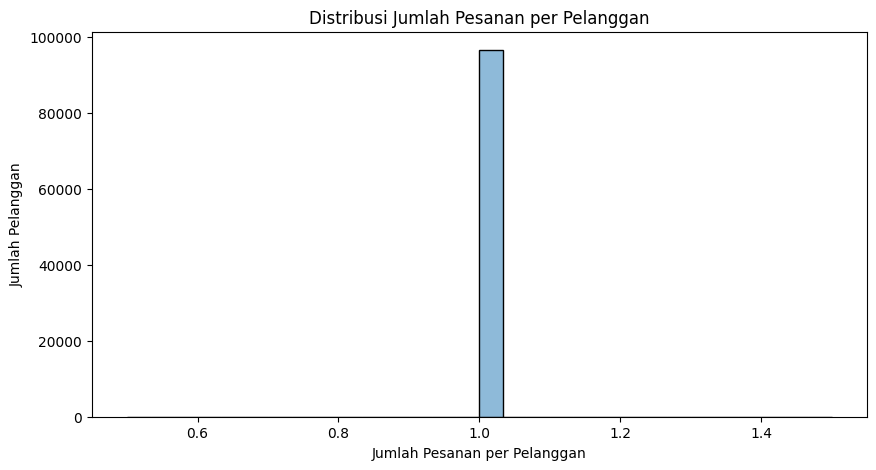

In [ ]:
order_counts = orders['customer_id'].value_counts()

plt.figure(figsize=(10,5))
sns.histplot(order_counts, bins=30, kde=True)
plt.xlabel("Jumlah Pesanan per Pelanggan")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Jumlah Pesanan per Pelanggan")
plt.show()


### Pertanyaan 2:

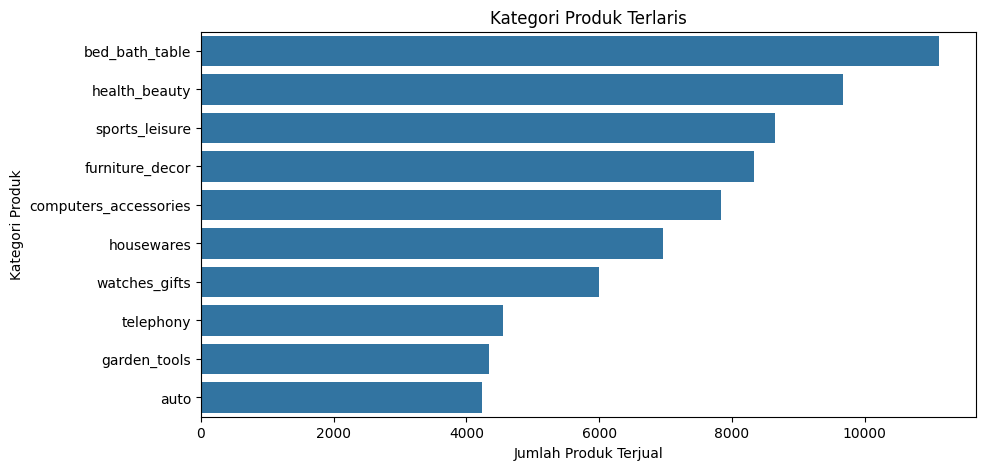

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.xlabel("Jumlah Produk Terjual")
plt.ylabel("Kategori Produk")
plt.title("Kategori Produk Terlaris")
plt.show()

**Insight:**

Pertanyaan 1
- Sebagian besar pelanggan hanya belanja sekali, jarang yang melakukan pembelian berulang.

- Pelanggan setia (yang belanja lebih dari sekali) jumlahnya sedikit.

- Perlu strategi seperti diskon atau program loyalitas untuk meningkatkan repeat order.

Pertanyaan 2
- Produk "bed_bath_table" paling laku, diikuti health_beauty dan sports_leisure.

- Produk rumah tangga, kecantikan, dan olahraga punya banyak peminat, bisa jadi fokus promosi.

- Beberapa kategori kurang diminati, mungkin perlu strategi pemasaran lebih agresif.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

Analisis tren yang saya lakukan pada pembelian pelanggan menunjukkan adanya lonjakan jumlah pesanan pada bulan-bulan tertentu, terutama menjelang akhir tahun. Lonjakan ini kemungkinan besar dipengaruhi oleh event promosi, diskon musiman, atau periode liburan yang meningkatkan aktivitas belanja pelanggan. Dengan memahami pola ini, perusahaan dapat merancang strategi pemasaran yang lebih efektif, seperti meningkatkan promosi di bulan-bulan dengan permintaan tinggi atau mengadakan kampanye diskon untuk menjaga stabilitas penjualan sepanjang tahun.
- Conclution pertanyaan 2

Hasil analisis yang saya lakukan menunjukkan bahwa kategori produk "bed_bath_table" dan "health_beauty" merupakan yang paling banyak terjual. Hal ini mencerminkan tingginya permintaan terhadap produk rumah tangga serta perawatan diri di pasar e-commerce. Dengan informasi ini, perusahaan dapat fokus pada pengelolaan stok untuk kategori produk yang memiliki tingkat permintaan tinggi serta merancang strategi pemasaran yang lebih optimal guna meningkatkan daya tarik produk-produk tersebut bagi pelanggan.